In [12]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [13]:
main_df = pd.read_csv('../data/processed/PROCESSED_DF.csv')
main_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,num_y
0,56,3,1,0,0,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,7,1,3,0,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,7,1,3,0,1,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,0,1,1,0,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,7,1,3,0,0,1,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,0


In [14]:
# Data split
target = 'num_y'
features = [
    'age',
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month',
    'day_of_week',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'poutcome',
    'emp.var.rate',
    'cons.price.idx',
    'cons.conf.idx',
    'euribor3m',
    'nr.employed'
    ]

X = main_df[features]
y = main_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.80)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(solver='saga', max_iter=2000)
model.fit(X_train, y_train)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=2000, solver='saga')

In [16]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
accuracy_test = accuracy_score(y_test, y_pred)
print(accuracy_test)

0.9089839152608866


In [18]:
y_pred_train = model.predict(X_train)
y_pred_train

array([0, 0, 0, ..., 1, 0, 0])

In [19]:
accuracy_train = accuracy_score(y_train, y_pred_train)
print(accuracy_train)

0.9076405008663812


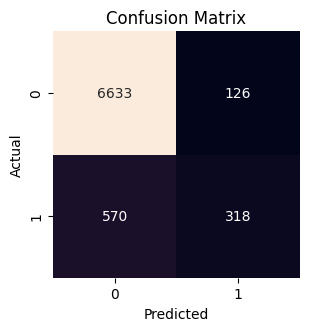

In [20]:
bank_cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(bank_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot = True, fmt = 'd', cbar = False)

plt.tight_layout()

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [21]:
hypeparams = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = LogisticRegression(solver='liblinear', max_iter=1000)

grid = GridSearchCV(model, hypeparams, scoring='accuracy', cv=5, n_jobs=-1)

In [22]:
grid.fit(X_train_scaled, y_train)
print(grid.best_params_)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:34

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [23]:
model_grid = LogisticRegression(penalty="l2", C=0.01, solver="saga", max_iter=1000)
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.9091146854975808